In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.drop(["Unnamed: 0","key","pickup_datetime"],axis=1,inplace=True)

In [11]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


<AxesSubplot:xlabel='fare_amount'>

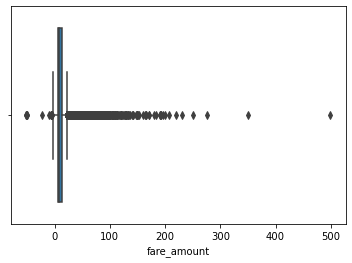

In [12]:
sns.boxplot(df["fare_amount"])

In [13]:
q1=df["fare_amount"].quantile(0.25)
q3=df["fare_amount"].quantile(0.75)
iqr=q3-q1

minr=q1-1.5*iqr
maxr=q3+1.5*iqr
print(minr,maxr)

-3.75 22.25


In [15]:
df.size

1199994

In [16]:
df=df[(df["fare_amount"]>minr) & (df["fare_amount"]<maxr)]

In [17]:
df.size

1096998

In [21]:
corr=round(df.corr(),2)

In [22]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.00,0.00,0.00,-0.00,0.00,0.01
pickup_longitude,0.00,1.00,-0.81,0.84,-0.85,-0.00
pickup_latitude,0.00,-0.81,1.00,-0.77,0.68,-0.00
dropoff_longitude,-0.00,0.84,-0.77,1.00,-0.91,0.00
dropoff_latitude,0.00,-0.85,0.68,-0.91,1.00,-0.00
passenger_count,0.01,-0.00,-0.00,0.00,-0.00,1.00


<AxesSubplot:>

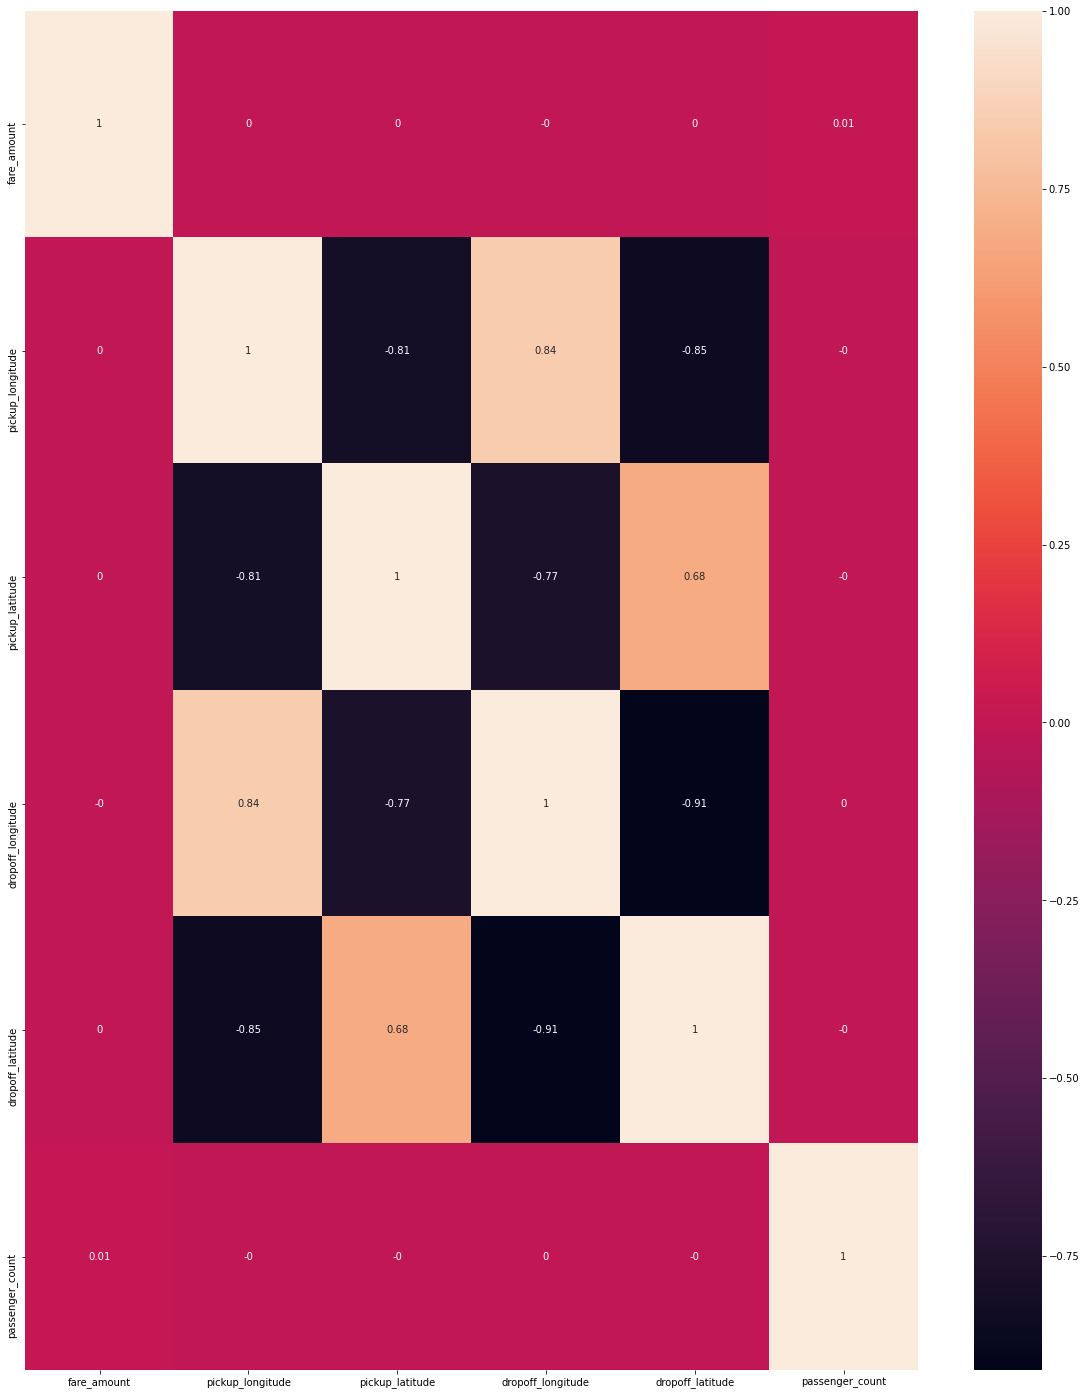

In [26]:
plt.figure(figsize=(20,25))
sns.heatmap(corr,annot=True)

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
x=df.iloc[:,1:]
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1
199995,-73.987042,40.739367,-73.986525,40.740297,1
199996,-73.984722,40.736837,-74.006672,40.739620,1
199998,-73.997124,40.725452,-73.983215,40.695415,1


In [33]:
y=df.iloc[:,0]
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 182833, dtype: float64

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("mean_absolute_error", mean_absolute_error(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score",r2_score(y_test,y_pred))

mean_absolute_error 3.2733549156332717
mean_squared_error 17.031575977325225
RMSE 4.126932998889759
R2_score 0.00013790002987823513


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("mean_absolute_error", mean_absolute_error(y_test,y_pred2))
print("mean_squared_error",mean_squared_error(y_test,y_pred2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("R2_score",r2_score(y_test,y_pred2))

mean_absolute_error 1.585514863637863
mean_squared_error 5.109353463052045
RMSE 2.260387901014347
R2_score 0.7000483754493321
